<a href="https://colab.research.google.com/github/anthonybrown0528/csc-442-course-project/blob/main/notebook/hw7/model_comparison_description_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd

In [89]:
filepath = 'https://raw.githubusercontent.com/anthonybrown0528/csc-442-course-project/refs/heads/main/dataset/clean/hw6/netflix_film_imdb_scores_cleaned_descriptions_df.csv'
df = pd.read_csv(filepath)

In [90]:
df.head()

,title,description_x,release_year,runtime,imdb_id,imdb_score,imdb_votes,show_id,type,director,...,country,date_added,age_certification,num_releases,listed_in,description_y,num_listed_in,first_cast,cast_freq_mean,genre_freq_mean
0,Monty Python and the Holy Grail,King Arthur accompany squire recruit Knights R...,1975,91,tt0071853,8.2,530877,s4218,Movie,"Terry Gilliam, Terry Jones",...,United Kingdom,"January 2, 2019",PG,1,"Action & Adventure, Classic Movies, Comedies",The Monty Python comedy clan skewers King Arth...,3,Graham Chapman,10.888889,831.000000
1,My Fair Lady,snobbish phonetics professor agree wager take ...,1964,170,tt0058385,7.8,94121,s1127,Movie,George Cukor,...,United States,"April 1, 2021",G,1,"Classic Movies, Music & Musicals",When a Cockney flower girl takes elocution les...,2,Audrey Hepburn,1.083333,203.500000
2,The Blue Lagoon,Two small child ship cook survive shipwreck fi...,1980,104,tt0080453,5.8,69053,s176,Movie,Randal Kleiser,...,United States,"September 1, 2021",R,1,"Dramas, Romantic Movies","Two shipwrecked children, stranded for years o...",2,Brooke Shields,1.375000,1446.500000
3,Bonnie and Clyde,In 1930s bore waitress Bonnie Parker fall love...,1967,110,tt0061418,7.7,111189,s6359,Movie,Arthur Penn,...,United States,"January 1, 2021",R,1,"Action & Adventure, Classic Movies, Dramas","Bonnie Parker and Clyde Barrow are young, in l...",3,Warren Beatty,1.777778,1076.333333
4,The Guns of Navarone,team allied saboteur assign impossible mission...,1961,158,tt0054953,7.5,50150,s178,Movie,J. Lee Thompson,...,"United Kingdom, United States","September 1, 2021",TV-14,1,"Action & Adventure, Classic Movies","During World War II, British forces launch an ...",2,Gregory Peck,1.300000,459.500000


In [91]:
column_subset = ['title', 'release_year', 'listed_in', 'description_x', 'imdb_score']
query_df = df[column_subset]

query_df

,title,release_year,listed_in,description_x,imdb_score
0,Monty Python and the Holy Grail,1975,"Action & Adventure, Classic Movies, Comedies",King Arthur accompany squire recruit Knights R...,8.2
1,My Fair Lady,1964,"Classic Movies, Music & Musicals",snobbish phonetics professor agree wager take ...,7.8
2,The Blue Lagoon,1980,"Dramas, Romantic Movies",Two small child ship cook survive shipwreck fi...,5.8
3,Bonnie and Clyde,1967,"Action & Adventure, Classic Movies, Dramas",In 1930s bore waitress Bonnie Parker fall love...,7.7
4,The Guns of Navarone,1961,"Action & Adventure, Classic Movies",team allied saboteur assign impossible mission...,7.5
...,...,...,...,...,...
2472,Myriam Fares: The Journey,2021,"Documentaries, International Movies, Music & M...",From pregnancy album preparation Lebanese sing...,2.3
2473,The Tambour of Retribution,2021,"Dramas, International Movies, Romantic Movies",son swordsman fall love daughter Tagaga social...,6.9
2474,Pitta Kathalu,2021,"International TV Shows, TV Dramas",Four different woman four journey love betraya...,5.1
2475,Loyiso Gola: Unlearning,2021,Stand-Up Comedy,South African comedian Loyiso Gola serve filte...,5.9


In [92]:
train_set, test_set = train_test_split(query_df, test_size=0.3, random_state=42)

In [93]:
features = ['title', 'release_year', 'genre', 'description']
response = 'imdb_score'

In [94]:
def separate_genre_df(data):
  movie_genre_map = {
      'title': [],
      'release_year': [],
      'genre': [],
      'description': [],
      'imdb_score': []
  }

  for _, row in data.iterrows():
    genres = row['listed_in'].split(',')

    for genre in genres:
      movie_genre_map['title'].append(row['title'])
      movie_genre_map['release_year'].append(row['release_year'])
      movie_genre_map['genre'].append(genre.strip())
      movie_genre_map['description'].append(row['description_x'].strip())
      movie_genre_map['imdb_score'].append(row['imdb_score'])


  movie_genre_df = pd.DataFrame(movie_genre_map)

  movie_genre_df = movie_genre_df[movie_genre_df['genre'] != 'International Movies']
  movie_genre_df = movie_genre_df[movie_genre_df['genre'] != 'International TV Shows']

  movie_genre_df

  return movie_genre_df

data_cleaned_df = separate_genre_df(train_set)

feature_df = data_cleaned_df[features]
target_df = data_cleaned_df[response]

data_cleaned_df['genre'].nunique()

39

In [95]:
X_train = data_cleaned_df[features]
y_train = data_cleaned_df['imdb_score']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [98]:
n_splits = 5

cv = KFold(n_splits=n_splits)
cv_scores = np.zeros(n_splits)
errors = np.zeros(n_splits)

for index, (train, val) in enumerate(cv.split(X_train, y_train)):
  X_train_train = X_train.iloc[train]
  y_train_train = y_train.iloc[train]

  X_train_val = X_train.iloc[val]
  y_train_val = y_train.iloc[val]

  # Set up a pipeline for feature extraction
  genre_probabilities_pipeline = Pipeline([('vectorizer', CountVectorizer(stop_words='english')), ('topic_model', MultinomialNB())])
  genre_probabilities_pipeline = genre_probabilities_pipeline.fit(X=X_train_train['description'], y=X_train_train['genre'])

  # Set up a pipeline for regression
  X_train_tmp = X_train_train.copy()

  X_train_tmp['imdb_score'] = y_train_train
  X_train_tmp = X_train_tmp.drop_duplicates(subset=['title', 'release_year'])

  X_train_train = X_train_tmp[features]
  y_train_train = X_train_tmp['imdb_score']

  compressed_feature = genre_probabilities_pipeline.predict_proba(X=X_train_train['description'])

  genre_weights_score_pipeline = Pipeline([('regressor', LinearRegression())])

  genre_weights_score_pipeline = genre_weights_score_pipeline.fit(X=compressed_feature, y=y_train_train)

  # Validate the final model

  X_val_tmp = X_train_val.copy()

  X_val_tmp['imdb_score'] = y_train_val
  X_val_tmp = X_val_tmp.drop_duplicates(subset=['title', 'release_year'])

  X_train_val = X_val_tmp[features]
  y_train_val = X_val_tmp['imdb_score']

  compressed_feature = genre_probabilities_pipeline.predict_proba(X=X_train_val['description'])
  score = genre_weights_score_pipeline.score(X=compressed_feature, y=y_train_val)

  cv_scores[index] = score
  errors[index] = mean_squared_error(y_train_val, genre_weights_score_pipeline.predict(compressed_feature))

In [99]:
print(cv_scores)
cv_scores.mean()

[ 0.0177179   0.05163403  0.03340853 -0.04583184  0.01970477]


np.float64(0.015326677049784498)

In [100]:
print(errors)
errors.mean()

[1.4098377  1.2867272  1.38155373 1.26159287 1.28436292]


np.float64(1.3248148818026286)

In [101]:
n_splits = 5

cv = KFold(n_splits=n_splits)
cv_scores = np.zeros(n_splits)

for index, (train, val) in enumerate(cv.split(X_train, y_train)):
  X_train_train = X_train.iloc[train]
  y_train_train = y_train.iloc[train]

  X_train_val = X_train.iloc[val]
  y_train_val = y_train.iloc[val]

  # Set up a pipeline for feature extraction
  genre_probabilities_pipeline = Pipeline([('vectorizer', TfidfVectorizer(stop_words='english')), ('topic_model', MultinomialNB())])
  genre_probabilities_pipeline = genre_probabilities_pipeline.fit(X=X_train_train['description'], y=X_train_train['genre'])

  # Set up a pipeline for regression
  X_train_tmp = X_train_train.copy()

  X_train_tmp['imdb_score'] = y_train_train
  X_train_tmp = X_train_tmp.drop_duplicates(subset=['title', 'release_year'])

  X_train_train = X_train_tmp[features]
  y_train_train = X_train_tmp['imdb_score']

  compressed_feature = genre_probabilities_pipeline.predict_proba(X=X_train_train['description'])

  genre_weights_score_pipeline = Pipeline([('regressor', LinearRegression())])

  genre_weights_score_pipeline = genre_weights_score_pipeline.fit(X=compressed_feature, y=y_train_train)

  # Validate the final model

  X_val_tmp = X_train_val.copy()

  X_val_tmp['imdb_score'] = y_train_val
  X_val_tmp = X_val_tmp.drop_duplicates(subset=['title', 'release_year'])

  X_train_val = X_val_tmp[features]
  y_train_val = X_val_tmp['imdb_score']

  compressed_feature = genre_probabilities_pipeline.predict_proba(X=X_train_val['description'])
  score = genre_weights_score_pipeline.score(X=compressed_feature, y=y_train_val)

  cv_scores[index] = score
  errors[index] = mean_squared_error(y_train_val, genre_weights_score_pipeline.predict(compressed_feature))

In [102]:
print(cv_scores)
cv_scores.mean()

[0.05122026 0.06349457 0.02563788 0.05673798 0.05915987]


np.float64(0.05125011240040724)

In [103]:
print(errors)
errors.mean()

[1.36175284 1.27063501 1.39266035 1.13786231 1.23266964]


np.float64(1.2791160329730284)

In [104]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

In [105]:
n_splits = 5

cv = KFold(n_splits=n_splits)
cv_scores = np.zeros(n_splits)

genre_weights_score_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('regressor', LinearRegression())]
)

grid_search = GridSearchCV(genre_weights_score_pipeline, param_grid={
    'vectorizer__stop_words': ['english', None],
    'vectorizer__max_features': [None, 100, 1000],
    'vectorizer__min_df': [1, 0.1, 0.01, 0.001]
})

grid_search = grid_search.fit(X=X_train['description'], y=y_train)
genre_weights_score_pipeline = grid_search.best_estimator_

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vectorizer__max_features,param_vectorizer__min_df,param_vectorizer__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.114475,0.011870,0.014625,0.000654,None,1.000,english,"{'vectorizer__max_features': None, 'vectorizer...",-0.524108,-0.510606,-0.471002,-0.338540,-0.657345,-0.500320,0.102334,18
1,0.106376,0.002459,0.015697,0.003902,None,1.000,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.552223,-0.469194,-0.436135,-0.348244,-0.608719,-0.482903,0.090712,17
2,0.059553,0.001635,0.012774,0.000611,None,0.100,english,"{'vectorizer__max_features': None, 'vectorizer...",0.003285,0.003883,-0.016940,-0.004916,-0.015070,-0.005951,0.008798,4
3,0.061561,0.007115,0.012102,0.000301,None,0.100,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.002922,0.011374,-0.017830,-0.002423,-0.009450,-0.004250,0.009599,1
4,0.067013,0.001152,0.013314,0.000681,None,0.010,english,"{'vectorizer__max_features': None, 'vectorizer...",-0.198899,-0.363475,-0.259156,-0.262632,-0.280805,-0.272993,0.052985,13
5,0.068527,0.001051,0.014514,0.003687,None,0.010,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.419719,-0.438354,-0.350525,-0.410364,-0.308910,-0.385575,0.048316,15
6,0.178354,0.016683,0.025541,0.002534,None,0.001,english,"{'vectorizer__max_features': None, 'vectorizer...",-1.183593,-1.365509,-1.167095,-1.030704,-1.568410,-1.263062,0.186144,20
7,0.176854,0.008698,0.023505,0.000969,None,0.001,None,"{'vectorizer__max_features': None, 'vectorizer...",-1.178894,-1.139894,-0.992849,-0.920450,-1.404493,-1.127316,0.167643,19
8,0.119661,0.023541,0.018527,0.004678,100,1.000,english,"{'vectorizer__max_features': 100, 'vectorizer_...",-0.086020,-0.090940,-0.082138,-0.044080,-0.149791,-0.090594,0.033942,11
9,0.078426,0.005698,0.012982,0.000728,100,1.000,None,"{'vectorizer__max_features': 100, 'vectorizer_...",-0.116901,-0.059092,-0.096263,-0.056015,-0.111204,-0.087895,0.025693,7


In [106]:
genre_weights_score_pipeline

Pipeline(steps=[('vectorizer', CountVectorizer(min_df=0.1)),
                ('regressor', LinearRegression())])

In [107]:
n_splits = 5

cv = KFold(n_splits=n_splits)
cv_scores = np.zeros(n_splits)

genre_weights_score_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('regressor', LinearRegression())]
)

grid_search = GridSearchCV(genre_weights_score_pipeline, param_grid={
    'vectorizer__stop_words': ['english', None],
    'vectorizer__max_features': [None, 100, 1000],
    'vectorizer__min_df': [1, 0.1, 0.01, 0.001]
})

grid_search = grid_search.fit(X=X_train['description'], y=y_train)
genre_weights_score_pipeline = grid_search.best_estimator_

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vectorizer__max_features,param_vectorizer__min_df,param_vectorizer__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.086133,0.004170,0.015736,0.000706,None,1.000,english,"{'vectorizer__max_features': None, 'vectorizer...",-0.234051,-0.183110,-0.242759,-0.195870,-0.328023,-0.236763,0.050838,14
1,0.084276,0.002205,0.016922,0.003176,None,1.000,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.238545,-0.129752,-0.212080,-0.183662,-0.293293,-0.211466,0.054552,13
2,0.058474,0.000814,0.013309,0.000739,None,0.100,english,"{'vectorizer__max_features': None, 'vectorizer...",0.006226,0.005513,-0.017019,-0.003600,-0.011612,-0.004098,0.009194,4
3,0.059033,0.002944,0.014663,0.003309,None,0.100,None,"{'vectorizer__max_features': None, 'vectorizer...",0.006319,0.012823,-0.018184,0.005841,-0.012782,-0.001197,0.012044,1
4,0.090445,0.024559,0.020780,0.005489,None,0.010,english,"{'vectorizer__max_features': None, 'vectorizer...",-0.211667,-0.295399,-0.252364,-0.349283,-0.245364,-0.270815,0.047431,15
5,0.112562,0.005166,0.022788,0.000905,None,0.010,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.370562,-0.341337,-0.303336,-0.529777,-0.309430,-0.370888,0.083017,17
6,0.133081,0.004707,0.025663,0.001996,None,0.001,english,"{'vectorizer__max_features': None, 'vectorizer...",-0.708468,-0.766320,-0.693226,-0.757710,-0.952371,-0.775619,0.092679,20
7,0.133508,0.009752,0.023316,0.004077,None,0.001,None,"{'vectorizer__max_features': None, 'vectorizer...",-0.682845,-0.618381,-0.576478,-0.610404,-0.840569,-0.665735,0.093947,19
8,0.075850,0.007727,0.014355,0.000747,100,1.000,english,"{'vectorizer__max_features': 100, 'vectorizer_...",-0.056413,-0.041343,-0.088572,-0.055244,-0.093671,-0.067049,0.020422,11
9,0.069738,0.002076,0.013577,0.001460,100,1.000,None,"{'vectorizer__max_features': 100, 'vectorizer_...",-0.088286,-0.031247,-0.106103,-0.056519,-0.049486,-0.066328,0.027110,8


In [108]:
genre_weights_score_pipeline

Pipeline(steps=[('vectorizer', TfidfVectorizer(min_df=0.1)),
                ('regressor', LinearRegression())])

<Axes: xlabel='word', ylabel='coef'>

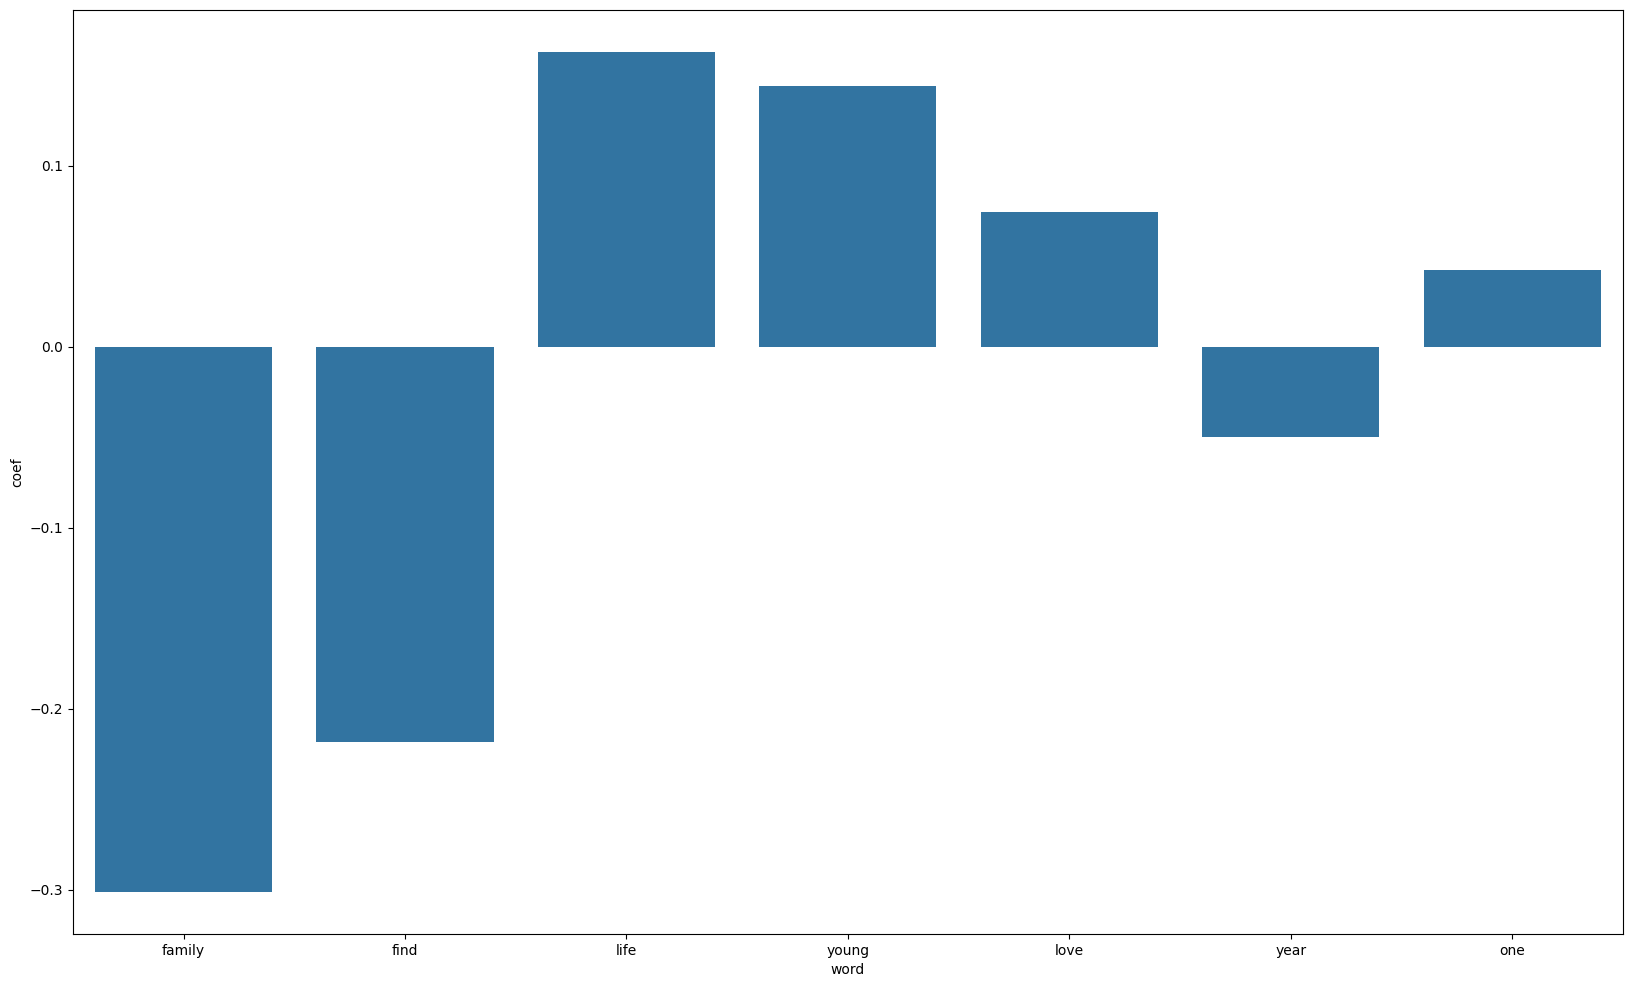

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

coefficients = genre_weights_score_pipeline['regressor'].coef_
words = genre_weights_score_pipeline['vectorizer'].get_feature_names_out()

results_df = {
    'coef': coefficients,
    'word': words,
}
results_df = pd.DataFrame(results_df)
results_df['abs_coef'] = np.abs(results_df['coef'])
significant_words = results_df.sort_values(by='abs_coef', ascending=False).iloc[:20]

plt.figure(figsize=(20,12))  # set plot size (denoted in inches) Source: https://stackoverflow.com/questions/59447378/sklearn-plot-tree-plot-is-too-small
sns.barplot(significant_words, x='word', y='coef')

In [110]:
n_splits = 5

cv = KFold(n_splits=n_splits)
cv_scores = np.zeros(n_splits)

for index, (train, val) in enumerate(cv.split(X_train, y_train)):
  X_train_train = X_train.iloc[train]
  y_train_train = y_train.iloc[train]

  X_train_val = X_train.iloc[val]
  y_train_val = y_train.iloc[val]

  # Set up a pipeline for regression
  X_train_tmp = X_train_train.copy()

  X_train_tmp['imdb_score'] = y_train_train
  X_train_tmp = X_train_tmp.drop_duplicates(subset=['title', 'release_year'])

  X_train_train = X_train_tmp[features]
  y_train_train = X_train_tmp['imdb_score']

  genre_weights_score_pipeline = Pipeline([
      ('vectorizer', CountVectorizer(stop_words='english')),
      ('regressor', LinearRegression())]
  )

  genre_weights_score_pipeline = genre_weights_score_pipeline.fit(X=X_train_train['description'], y=y_train_train)

  # Validate the final model

  X_val_tmp = X_train_val.copy()

  X_val_tmp['imdb_score'] = y_train_val
  X_val_tmp = X_val_tmp.drop_duplicates(subset=['title', 'release_year'])

  X_train_val = X_val_tmp[features]
  y_train_val = X_val_tmp['imdb_score']

  score = genre_weights_score_pipeline.score(X=X_train_val['description'], y=y_train_val)

  cv_scores[index] = score
  errors[index] = mean_squared_error(y_train_val, genre_weights_score_pipeline.predict(X_train_val['description']))

In [111]:
print(cv_scores)
cv_scores.mean()

[-0.49858692 -0.48156377 -0.39303278 -0.39766883 -0.56872475]


np.float64(-0.46791541317563967)

In [112]:
print(errors)
errors.mean()

[2.1508733  2.01016113 1.99106829 1.68601582 2.05531134]


np.float64(1.978685974198413)